In [1]:
import pandas as pd

In [2]:
car = pd.read_csv('car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car.Owner.unique()

array([0, 1, 3], dtype=int64)

In [7]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car['Years_old'] = 2022 - car.Year
car = car.drop(['Car_Name','Year'],axis=1)
car.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [9]:
car_data = pd.get_dummies(car,drop_first=True)
car_data.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
5,9.25,9.83,2071,0,4,1,0,0,1
6,6.75,8.12,18796,0,7,0,1,0,1
7,6.50,8.61,33429,0,7,1,0,0,1
8,8.75,8.89,20273,0,6,1,0,0,1
9,7.45,8.92,42367,0,7,1,0,0,1


In [10]:
x = car_data.drop("Selling_Price", axis=1)
y = car_data.Selling_Price

In [11]:
x.shape

(301, 8)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
y_train.shape

(240,)

In [14]:
y_test.shape

(61,)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor() # RandomForestRegressor gives us the best result here.
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
model.score(x_test,y_test)

0.9643624979816348

In [17]:
x_test.iloc[0]

Present_Price                 0.57
Kms_Driven                24000.00
Owner                         0.00
Years_old                     6.00
Fuel_Type_Diesel              0.00
Fuel_Type_Petrol              1.00
Seller_Type_Individual        1.00
Transmission_Manual           0.00
Name: 177, dtype: float64

## Using Cross_val_score

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
score = cross_val_score(RandomForestRegressor(),x,y,cv=cv)

In [19]:
score

array([0.96122059, 0.95577312, 0.95572791, 0.90707639, 0.92511953])

In [20]:
score.mean()

0.9409835085887035

## Finding best and suitable model & Params for our models

In [21]:
from sklearn.model_selection import GridSearchCV
def find_best_model(x,y):
    all_models = {
        'linear regression':{
            'model' : LinearRegression(),
            'params' : {
                'positive' : [True,False]
            }
        },
        
        'Decision Tree':{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared-error','absolute_error'],
                'min_samples_split' : [2,4,6],
                'splitter': ['best','random']
            }
        },
        
        'Random Forest': {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [10,50,100],
                'min_samples_split' : [2,4,6]                
            }            
        }   
    }

    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
    for names,config in all_models.items():
        GS = GridSearchCV(config['model'],config['params'],cv = cv,return_train_score=False)
        GS.fit(x,y)
        scores.append({
            'model' : names,
            'best_score' : GS.best_score_,
            'best_params' : GS.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
# in this way we can find best model using GridSearchCV its not a good function as we are getting a lot of errors because of it
# that's why we will improvise it more
# find_best_model(x,y)

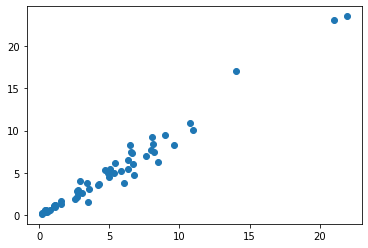

In [22]:
predict = model.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(predict,y_test)

In [28]:
model.score(x_test,y_test)

0.9643624979816348

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict,y_test)
mse

In [31]:
from joblib import dump,load
dump(model,'car_predictor.joblib')

['car_predictor.joblib']

In [30]:
model5 = load('car_predictor.joblib')

NameError: name 'load' is not defined